<h2>Descenso de gradiente</h2>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12.0, 9.0)

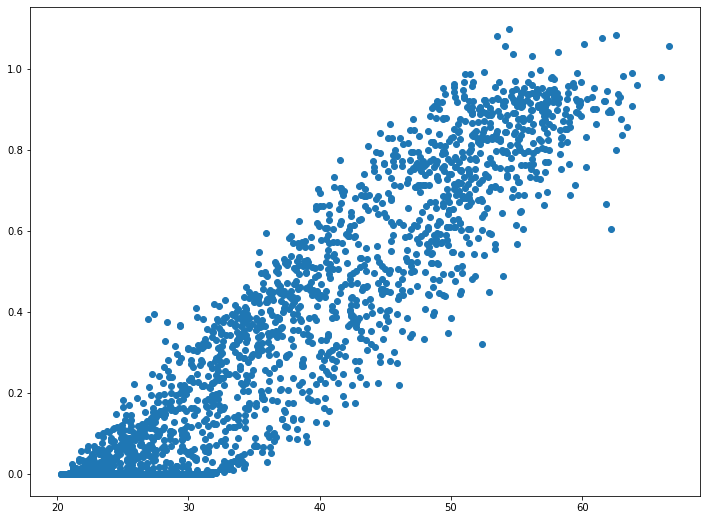

In [70]:
# Obtenemos los datos del csv y lo convertimos a un dataframe de pandas
data = pd.read_csv('Weather_Sensor_Data.csv')

# Obtenemos solo las columnas objetivo
data = data.loc[:, ["MODULE_TEMPERATURE", "IRRADIATION"]]
data = data.dropna()

# Asignamos los valores de la primer y segunda columna a las variables x - y
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

#Graficamos los datos 
plt.scatter(X, Y)
plt.show()

En esta parte se busca aproximar los valores de las variables $m$ y $c$ que forman parte de la siguiente funcion:

$Y = mX + c$

Utilizando el <b>Descenso de gradiente</b>

In [71]:
# Se inicializan las variables objetivo en cero
m = 0 
c = 0

L = 0.0001  # Taza de aprendizaje
epochs = 500  # Numero de iteraciones 

n = float(len(X)) # Numero de elementos en X

# Descenso de gradiente  
for i in range(epochs): 
    Y_pred = m*X + c  # Valor predicho para Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivada de la funcion de perdida con respecto a m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivada de la funcion de perdida con respecto a c
    m = m - L * D_m  
    c = c - L * D_c  
    
print (m, c)

0.009306073084131448 -0.0063738686975325426


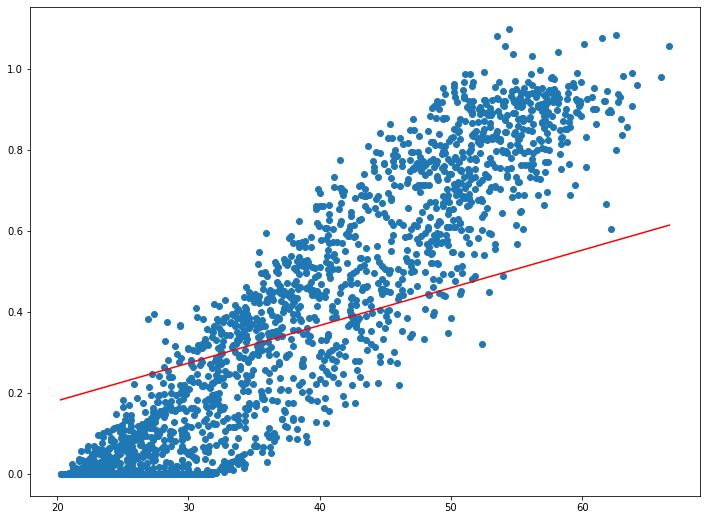

In [72]:
# Obtenemos los valores predichos para Y 
Y_pred = m*X + c

#Graficamos la funcion lineal con respecto a los datos
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()


Este problema tambien se puede solucionar utilizando otros metodos de algebra lineal. Como por ejemplo esta vez se solucionara utilizando la <b>descompocicion en componentes principales</b> $SVD$

En este ejemplo se podria calcular Las matricez $USV$ y despues calcular la matriz pseudoinversa de los datos pero en lugar de eso utilizaremos la funcion de numpy que te devuelve la matriz pseudoinversa directamente.

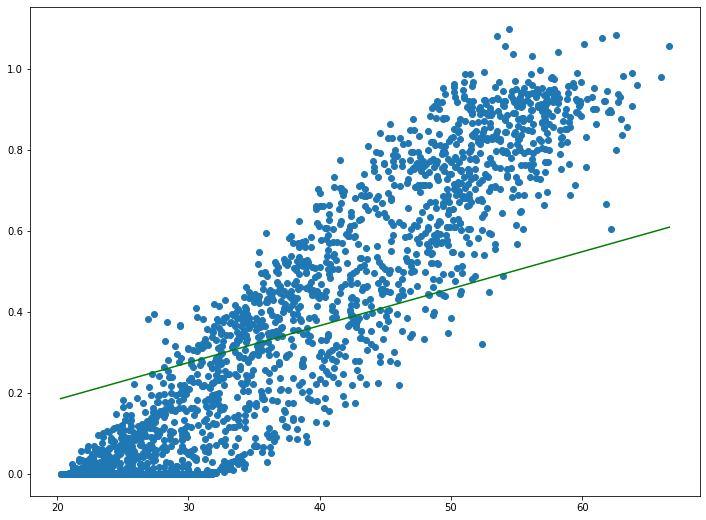

In [73]:
from numpy.linalg import pinv

X2 = data.iloc[:, 0]
Y2 = data.iloc[:, 1]

X2 = X2.values
Y2 = Y2.values

X2 = X2.reshape((len(X2), 1))


b = pinv(X2).dot(Y2)

yhat = X2.dot(b)

plt.scatter(X2, Y2)
plt.plot([min(X2), max(X2)], [min(yhat), max(yhat)], color='green') 
plt.show()


<h3>Conclucion:</h3>
Hay varias maneras de conseguir los coeficientes de un modelo de regresión lineal, aquí se pudieron apreciar dos métodos, descenso de gradiente y SVD. El método de SVD se dice ser el método más confiable y numéricamente preciso. Mientras que el descenso de gradiente es dependiente del número de iteraciones y la tasa de aprendizaje para arrojar un resultado confiable. La razón principal del porqué descenso de gradiente es más utilizado que SVD es por la complejidad computacional. Las operaciones de matrices realizadas para encontrar las matrices USV y posteriormente la pseudoinversa son muy costosas computacionalmente hablando, por eso se tiende más a utilizar métodos iterativos que no requieran mucho poder de cómputo.